Machine Learning Lab : 11

Aim: To implement SVM using scikit-learn library and train it to classify the given dataset.



In [ ]:
import numpy as np #RZYy98ATcy78GpE
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

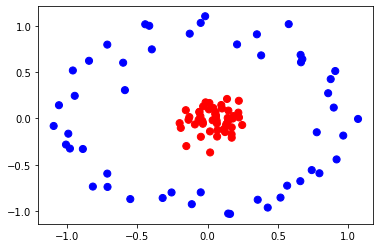

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7

In [ ]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
  stop = X_set[:, 0].max() + 1,
  step = 0.01),

  np.arange(start = X_set[:, 1].min() - 1,
  stop = X_set[:, 1].max() + 1,
  step = 0.01))

  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),

  X2.ravel()]).T).reshape(X1.shape),

  alpha = 0.75,
  cmap = zero_one_colourmap)

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
      c = (zero_one_colourmap)(i), label = j)

  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


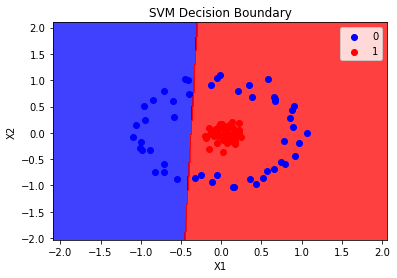

In [ ]:
plot_decision_boundary(X, y, classifier)

In [ ]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

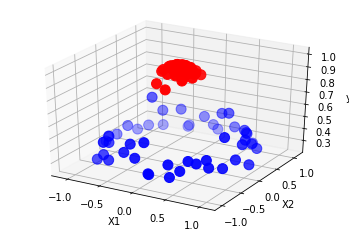

In [ ]:
plot_3d_plot(X,y)

Lab : 11

In [1]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

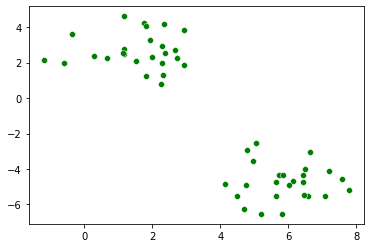

In [3]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
# creating datasets X containing n_samples
# Y containing two classes
X,Y=make_blobs(n_samples=50, n_features=2 ,centers=2,random_state=175)
# plotting scatters
sns.scatterplot(x=X[:,0], y=X[:,1], c =["green"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=175)
print("X_train : ", X_train)
print("X_test : ", X_test)
print("y_train : ", y_train)
print("y_test : ", y_test)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)

X_train :  [[ 0.27088063  2.39359392]
 [ 6.4320543  -4.73355403]
 [ 2.24985564  0.80121984]
 [ 2.29733454  2.93884082]
 [-0.36241469  3.60765613]
 [ 5.20895302 -6.53510549]
 [ 6.45029225 -5.45666622]
 [ 2.72987473  2.2645398 ]
 [ 2.92503387  3.86502846]
 [ 1.50999133  2.098059  ]
 [ 1.176843    2.79378356]
 [ 2.2706585   1.97895955]
 [ 4.79430564 -2.93903976]
 [ 1.17442719  2.49295397]
 [-0.6153901   1.98556315]
 [ 5.71386303 -4.31315811]
 [ 5.63580053 -4.75950881]
 [ 6.59514953 -5.52120893]
 [ 5.0503361  -2.51618948]
 [ 6.6447366  -3.05190083]
 [ 7.77369514 -5.167916  ]
 [ 1.13398229  2.52687785]
 [ 4.12705703 -4.82429852]
 [ 5.80278225 -6.51299136]
 [ 4.97164702 -3.54481095]
 [ 2.35074631  4.17985465]
 [ 6.1308246  -4.70423746]
 [ 1.98069811  2.31451925]
 [ 6.50002215 -3.98605497]
 [ 2.31391607  1.319549  ]
 [ 7.58370882 -4.57997242]
 [ 4.71056977 -6.25647181]
 [ 1.17474644  4.61620435]
 [ 6.01614411 -4.91456016]
 [ 5.63778855 -5.49926418]
 [ 4.48650045 -5.50699677]
 [ 4.76223871 -4.

In [6]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_function(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
    stop = X_set[:, 0].max() + 1,
    step = 0.01),

    np.arange(start = X_set[:, 1].min() - 1,
    stop = X_set[:, 1].max() + 1,
    step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),

    X2.ravel()]).T).reshape(X1.shape),

    alpha = 0.75,
    cmap = zero_one_colourmap)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = (zero_one_colourmap)(i), label = j)

    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

In [8]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')
# Train classifier
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
print("y_pred : ", y_pred)

y_pred :  [0 1 1 1 0 1 1 0 0 1]


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


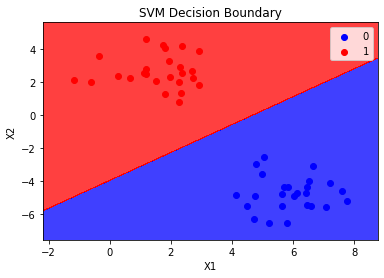

In [12]:
# Plot decision function on training and test data
plot_decision_function(X, Y, clf)

No handles with labels found to put in legend.


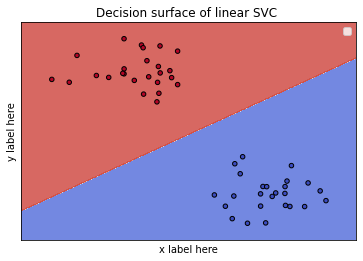

In [15]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [17]:
rbf_classifier = svm.SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)
print("y_pred : ", y_pred)

y_pred :  [0 1 1 1 0 1 1 0 0 1]


In [18]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


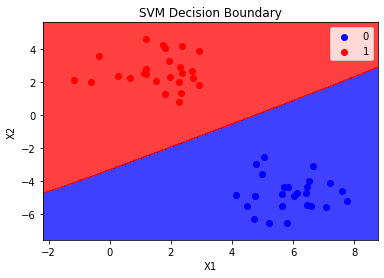

In [19]:
plot_decision_function(X, Y, rbf_classifier)

In [20]:
poly_classifier = svm.SVC(kernel="poly")
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)
print("y_pred : ", y_pred)

y_pred :  [0 1 1 1 0 1 1 0 0 1]


In [21]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


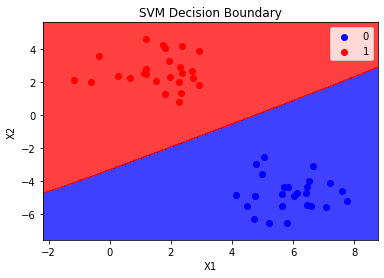

In [22]:
plot_decision_function(X, Y, rbf_classifier)

Part B : Breast Cancer Prediction Example

In [23]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()

In [25]:
# print the names of the 13 features
print("Features : ", cancer.feature_names[:13])
# print the label type of cancer('malignant' 'benign')
print("Labels : ", cancer.target_names)

Features :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error']
Labels :  ['malignant' 'benign']


In [26]:
# print data(feature)shape
feature=cancer.data
target=cancer.target
print("feature.shape : ", feature.shape)
print("target.shape : ", target.shape)
# print the cancer labels (0:malignant, 1:benign)
print("target : ", target)

feature.shape :  (569, 30)
target.shape :  (569,)
target :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1

(455, 30) (455,)
(114, 30) (114,)


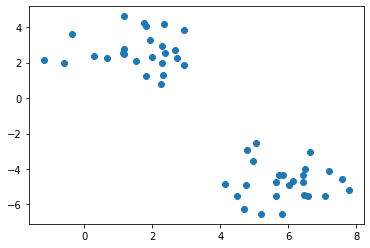

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2, random_state=175)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

# plotting scatters
# sns.scatterplot(x=feature, y=target, c =["green"])
plt.scatter(X[:,0],X[:,1])
plt.show()

In [28]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')
# Train classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred : ", y_pred)

y_pred :  [0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1
 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0
 1 1 0]


In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100)
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision : ",metrics.precision_score(y_test, y_pred)*100)
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall : ",metrics.recall_score(y_test, y_pred)*100)

Accuracy :  95.6140350877193
Precision :  96.0
Recall :  97.2972972972973


Try SVM classifier on MNIST dataset, compare the performance of linear, polynomial and RBF kernels.

In [30]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [32]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()
features_train, features_test = features_train.reshape([-1, 784]), features_test.reshape([-1, 784])
features_train, features_test = features_train / 255., features_test / 255.
print("features_train.shape : ", features_train.shape)
print("features_test.shape : ", features_test.shape)
print("targets_train.shape : ", targets_train.shape)
print("targets_test.shape : ", targets_test.shape)

features_train.shape :  (60000, 784)
features_test.shape :  (10000, 784)
targets_train.shape :  (60000,)
targets_test.shape :  (10000,)


In [33]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(features_train[:15000], targets_train[:15000])

SVC(kernel='linear')

In [34]:
prediction = svm_classifier.predict(features_test)
print("prediction : ", prediction)
from sklearn.metrics import accuracy_score

print("Accuracy - {}%".format(accuracy_score(y_pred=prediction, y_true=targets_test)*100))

prediction :  [7 2 1 ... 4 5 6]
Accuracy - 92.19000000000001%


In [35]:
svm_classifier = svm.SVC(kernel='poly')
svm_classifier.fit(features_train[:15000], targets_train[:15000])

SVC(kernel='poly')

In [36]:
prediction = svm_classifier.predict(features_test)
print(prediction)

print("Accuracy - {}%".format(accuracy_score(y_pred=prediction, y_true=targets_test)*100))

[7 2 1 ... 4 5 6]
Accuracy - 96.09%


In [37]:
svm_classifier = svm.SVC(kernel='rbf')
svm_classifier.fit(features_train[:15000], targets_train[:15000])

SVC()

In [38]:
prediction = svm_classifier.predict(features_test)
print(prediction)

print("Accuracy - {}%".format(accuracy_score(y_pred=prediction, y_true=targets_test)*100))

[7 2 1 ... 4 5 6]
Accuracy - 96.67%


SVM_Kernel

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

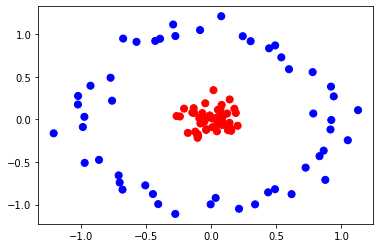

In [40]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("X_train : ", X_train)
print("X_test : ", X_test)
print("y_train : ", y_train)
print("y_test : ", y_test)

X_train :  [[ 8.73177845e-02  3.33128040e-02]
 [-1.02267555e+00  2.76385392e-01]
 [ 8.63406821e-01 -3.66282576e-01]
 [-1.42527837e-01  8.48883034e-02]
 [-6.76783095e-01  9.51134115e-01]
 [-1.79793524e-01 -1.57609086e-01]
 [-3.93407482e-01  9.49190693e-01]
 [-4.07460510e-01 -9.95289466e-01]
 [-4.59916744e-02  1.90305270e-01]
 [ 7.99474900e-02  1.71188855e-01]
 [ 5.14868974e-02  1.14046354e-01]
 [ 4.61943257e-02 -5.22223267e-02]
 [-1.02408924e+00  1.76100345e-01]
 [ 8.59719123e-02 -3.17432316e-02]
 [-5.06689314e-01 -7.74828734e-01]
 [ 7.05710130e-02  1.23890068e-01]
 [ 7.83607063e-01  7.01251984e-02]
 [ 8.74478329e-03 -9.08740597e-02]
 [ 3.02882410e-02  1.38883105e-02]
 [ 8.31635951e-01 -4.31535600e-01]
 [-1.04101318e-01 -1.73621548e-01]
 [ 5.97079558e-01  5.90966035e-01]
 [-7.73405205e-01  4.90598923e-01]
 [ 1.70547498e-02  3.44782730e-01]
 [ 8.41196087e-02 -6.45071322e-02]
 [ 8.76122946e-01 -7.10023160e-01]
 [-2.40997772e-01  3.53458363e-02]
 [-1.00602342e-01 -1.94823965e-01]
 [ 6.8334

In [43]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5

In [45]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
    stop = X_set[:, 0].max() + 1,
    step = 0.01),

    np.arange(start = X_set[:, 1].min() - 1,
    stop = X_set[:, 1].max() + 1,
    step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),

    X2.ravel()]).T).reshape(X1.shape),

    alpha = 0.75,
    cmap = zero_one_colourmap)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = (zero_one_colourmap)(i), label = j)

    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


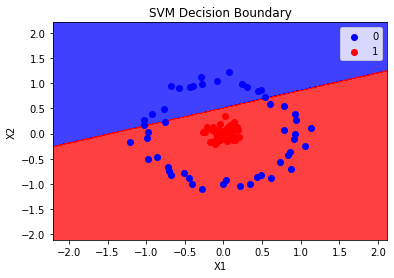

In [46]:
plot_decision_boundary(X, y, classifier)

In [47]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

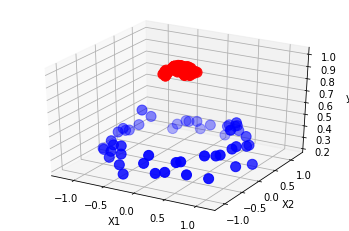

In [48]:
plot_3d_plot(X,y)

In [49]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)
print("y_pred : ", y_pred)

In [50]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


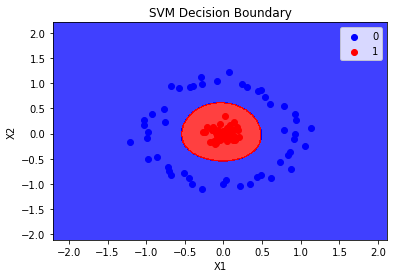

In [51]:
plot_decision_boundary(X, y, rbf_classifier)

In [54]:
poly_classifier = SVC(kernel="poly",degree=3)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)
print("y_pred : ", y_pred)

y_pred :  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]


In [55]:
accuracy_score(y_test, y_pred)

0.6

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


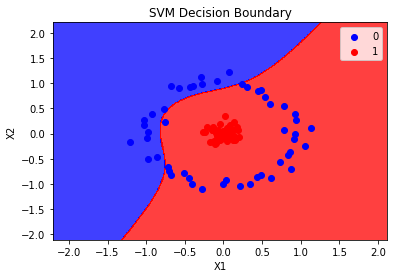

In [56]:
plot_decision_boundary(X, y, poly_classifier)